# Regressão 01 - tarefa 03 - transformações em X e Y

In [432]:
import pandas as pd
import numpy as np 
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
%matplotlib inline

In [434]:
warnings.filterwarnings('ignore')

##### Carregamento base de dados:

In [11]:
tips = load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

##### Criação da matriz de design e modelo de regressão para ```tip```:

In [97]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           2.64e-20
Time:                        17:13:06   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Ajuste do modelo utilizando apenas variáveis significantes e plotagem do gráfico de resíduos:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        17:54:10   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

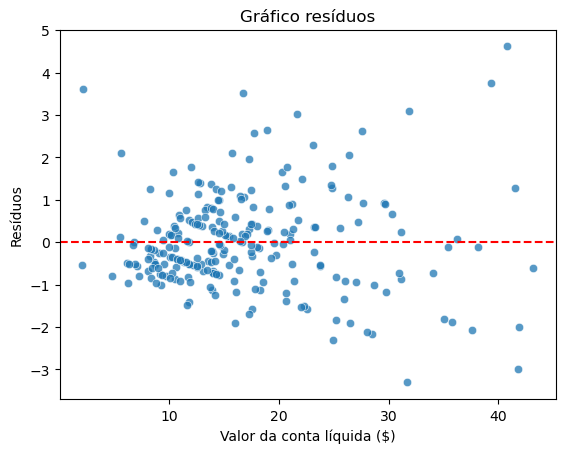

In [278]:
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg = sm.OLS(y, X).fit()
tips['resid'] = reg.resid
sns.scatterplot(data=tips,
                x='net_bill',
                y='resid',
                alpha=.75
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )
plt.title('Gráfico resíduos')
plt.ylabel('Resíduos')
plt.xlabel('Valor da conta líquida ($)')
reg.summary()

##### Ajuste do modelo aplicando as funções log e polinômio:

In [238]:
y_log, X_log = patsy.dmatrices('tip ~ np.log(net_bill+1)', tips)
y_poli, X_poli = patsy.dmatrices('tip ~ np.power(net_bill,2) + net_bill', tips)
reg_log = sm.OLS(y_log, X_log).fit()
reg_poli = sm.OLS(y_poli, X_poli).fit()

In [240]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     106.0
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           7.57e-21
Time:                        17:50:55   Log-Likelihood:                -380.64
No. Observations:                 244   AIC:                             765.3
Df Residuals:                     242   BIC:                             772.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.8155      0.473     -3.835      0.000      -2.748      -0.883
np.log(net_bill + 1)     1.7296      0.168     10.294      0.000       1.399       2.061
==============================================================================
Omnibus:                       68.501   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.657
Skew:                           1.227   Prob(JB):                     1.46e-42
Kurtosis:                       6.596   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
reg_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           4.96e-22
Time:                        17:51:00   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Plotagem dos gráficos de resíduos para o modelo com log aplicado e para o modelo com o polinômio aplicado:

(-3.5, 6.0)

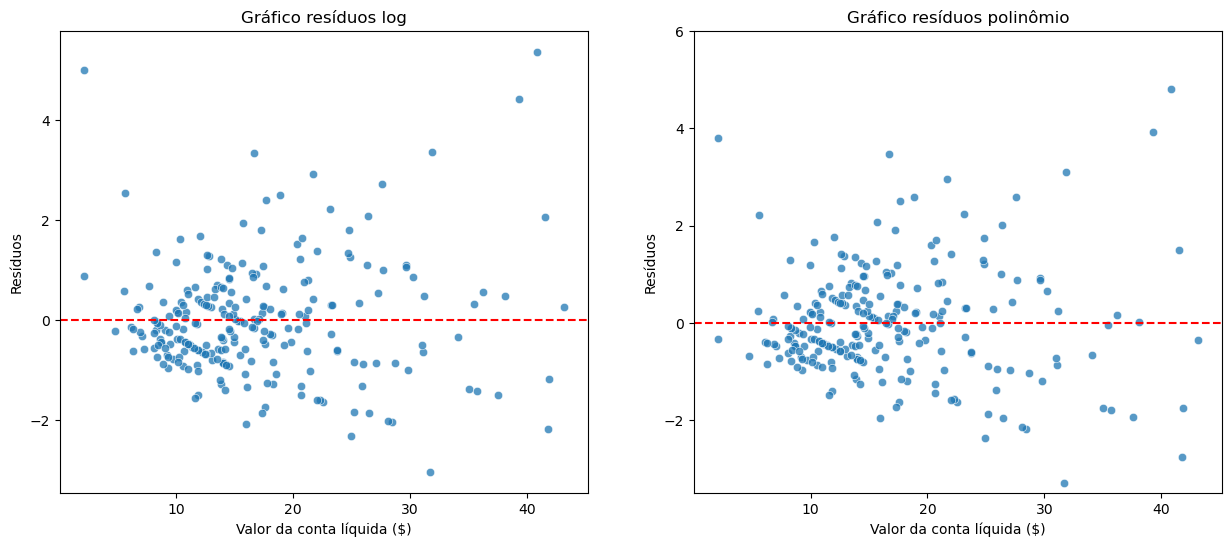

In [276]:
tips['resid_log'] = reg_log.resid
tips['resid_poli'] = reg_poli.resid

fig, axes = plt.subplots(1,2, figsize=(15, 6))
ax1 = axes[0]
sns.scatterplot(data=tips,
                x='net_bill',
                y='resid_log',
                alpha=.75,
                ax=ax1
               )
ax1.axhline(y=0,
            c='r',
            linestyle='--')
ax1.set_title('Gráfico resíduos log')
ax1.set_ylabel('Resíduos')
ax1.set_xlabel('Valor da conta líquida ($)')

ax2 = axes[1]
sns.scatterplot(data=tips,
                x='net_bill',
                y='resid_poli',
                alpha=.75,
                ax=ax2
               )
ax2.axhline(y=0,
            c='r',
            linestyle='--')
ax2.set_title('Gráfico resíduos polinômio')
ax2.set_ylabel('Resíduos')
ax2.set_xlabel('Valor da conta líquida ($)')
ax2.set_ylim(-3.5,6)

##### Análise dos gráficos de resíduos e escolha do melhor modelo:

Por conta do valor mais alto do $R^2$ do modelo ```reg_poli``` e seus resíduos estando distribuídos de forma menos padronizadas que o modelo ```reg_log``` e ```reg```, ```reg_poli``` é o melhor modelo.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip_pct``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

##### Criação da matriz de design e modelo de regressão para ```tip_pct```:

In [149]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.85e-05
Time:                        17:31:58   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Ajuste do modelo utilizando apenas variáveis significantes e plotagem do gráfico de resíduos:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        17:53:46   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

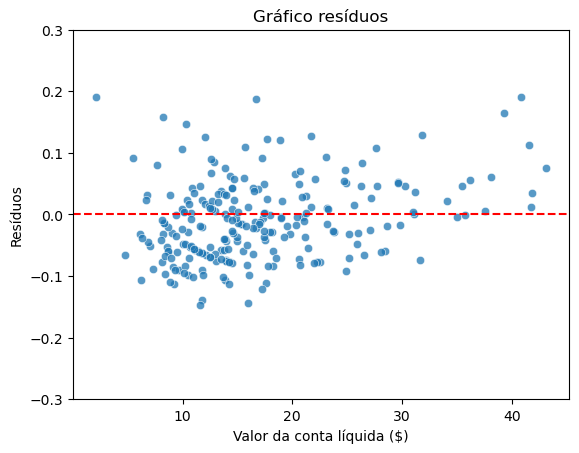

In [274]:
y_pct, X_pct = patsy.dmatrices('tip_pct ~ net_bill', tips)
reg_pct = sm.OLS(y_pct, X_pct).fit()
tips['resid'] = reg_pct.resid

sns.scatterplot(data=tips,
                x='net_bill',
                y='resid',
                alpha=.75
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos')
plt.ylabel('Resíduos')
plt.xlabel('Valor da conta líquida ($)')
plt.ylim(-0.3,0.3)
reg_pct.summary()

##### Ajuste do modelo aplicando as funções log e polinômio:

In [266]:
y_log_pct, X_log_pct = patsy.dmatrices('tip_pct ~ np.log(net_bill+.01)', tips)
y_poli_pct, X_poli_pct = patsy.dmatrices('tip_pct ~ np.power(net_bill,2) + net_bill', tips)
reg_log_pct = sm.OLS(y_log_pct, X_log_pct).fit()
reg_poli_pct = sm.OLS(y_poli_pct, X_poli_pct).fit()

In [268]:
reg_log_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.06
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.69e-13
Time:                        17:52:30   Log-Likelihood:                 123.77
No. Observations:                 244   AIC:                            -243.5
Df Residuals:                     242   BIC:                            -236.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.6183      0.054     11.434      0.000       0.512       0.725
np.log(net_bill + .01)    -0.1534      0.020     -7.814      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.982   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171673.330
Skew:                           9.853   Prob(JB):                         0.00
Kurtosis:                     131.443   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
reg_poli_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.06e-09
Time:                        17:52:33   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4851      0.047     10.332      0.000       0.393       0.578
np.power(net_bill, 2)     0.0005      0.000      4.356      0.000       0.000       0.001
net_bill                 -0.0268      0.005     -5.477      0.000      -0.036      -0.017
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Plotagem dos gráficos de resíduos para o modelo com log aplicado e para o modelo com o polinômio aplicado:

(-0.3, 0.3)

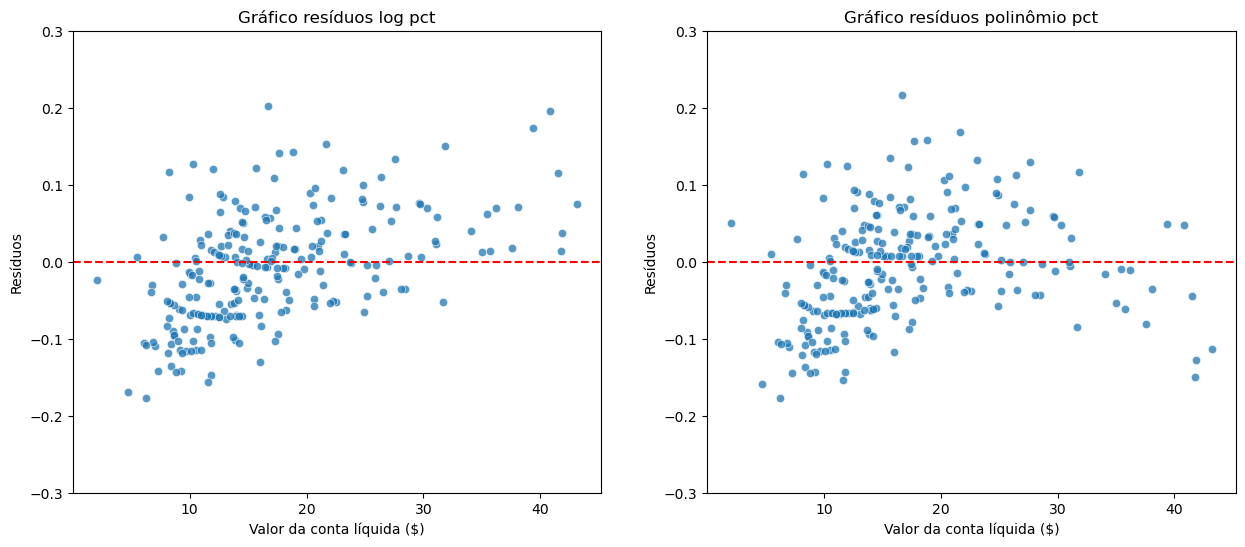

In [272]:
tips['resid_log_pct'] = reg_log_pct.resid
tips['resid_poli_pct'] = reg_poli_pct.resid

fig, axes = plt.subplots(1,2, figsize=(15, 6))
ax1 = axes[0]
sns.scatterplot(data=tips,
                x='net_bill',
                y='resid_log_pct',
                alpha=.75,
                ax=ax1
               )
ax1.axhline(y=0,
            c='r',
            linestyle='--')
ax1.set_title('Gráfico resíduos log pct')
ax1.set_ylabel('Resíduos')
ax1.set_xlabel('Valor da conta líquida ($)')
ax1.set_ylim(-0.3,0.3)

ax2 = axes[1]
sns.scatterplot(data=tips,
                x='net_bill',
                y='resid_poli_pct',
                alpha=.75,
                ax=ax2
               )
ax2.axhline(y=0,
            c='r',
            linestyle='--')
ax2.set_title('Gráfico resíduos polinômio pct')
ax2.set_ylabel('Resíduos')
ax2.set_xlabel('Valor da conta líquida ($)')
ax2.set_ylim(-0.3,0.3)

##### Análise dos gráficos de resíduos e escolha do melhor modelo:

Por conta do valor mais alto do $R^2$ do modelo ```reg_log_pct``` e seus resíduos estando distribuídos de forma menos padronizadas que o modelo ```reg_poli_pct``` e ```reg_pct```, ```reg_log_pct``` é o melhor modelo.

##### Cálculo do $R^2$ para o modelo ```reg_poli``` e ```reg_log_pct```:

In [578]:
tips['pred_tip_pct'] = np.exp(reg_log_pct.fittedvalues)

r_squared_pct = (tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2).round(3)
r_squared_tip = (reg_poli.rsquared).round(3)

print(f'Coeficiente de determinação (R²) para tip: {r_squared_tip} \nCoeficiente de determinação (R²) para tip_pct: {r_squared_pct}\n')

if r_squared_pct < r_squared_tip:
    print(f'O coeficiente de determinação (R²) de tip ({r_squared_tip}) é maior que o de tip_pct ({r_squared_pct})')
else:
    print(f'O coeficiente de determinação (R²) de tip_pct ({r_squared_pct}) é maior que o de tip ({r_squared_tip})')

Coeficiente de determinação (R²) para tip: 0.334 
Coeficiente de determinação (R²) para tip_pct: 0.231

O coeficiente de determinação (R²) de tip (0.334) é maior que o de tip_pct (0.231)


O modelo ```reg_poli``` utilizando a variável ```tip``` como resposta possui o maior coeficiente de determinação.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

##### Leitura do DataFrame:

In [762]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


##### Interpretação dos metadados do DataFrame:

In [474]:
metadados = pd.DataFrame({'dtypes': previsao_renda.dtypes})
metadados['missing'] = previsao_renda.isnull().sum()
metadados['perc_missing'] = round((metadados['missing']/previsao_renda.shape[0])*100)
metadados['valores_unicos'] = previsao_renda.nunique()

metadados

,dtypes,missing,perc_missing,valores_unicos
Unnamed: 0,int64,0,0.0,15000
data_ref,object,0,0.0,15
id_cliente,int64,0,0.0,9845
sexo,object,0,0.0,2
posse_de_veiculo,bool,0,0.0,2
posse_de_imovel,bool,0,0.0,2
qtd_filhos,int64,0,0.0,8
tipo_renda,object,0,0.0,5
educacao,object,0,0.0,5
estado_civil,object,0,0.0,5


De todas as variáveis a única que possui missing values é ```tempo_emprego```, portanto vale observar sua distribuição.

##### Análise da distribuição da variável ```tempo_emprego```:

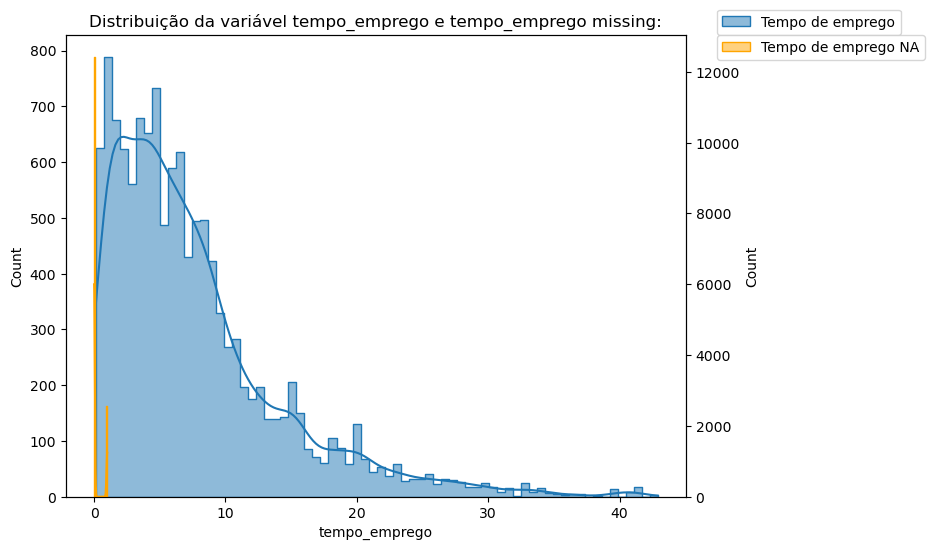

In [766]:
previsao_renda['tempo_emprego_na'] = previsao_renda['tempo_emprego'].isna()
plt.rc('figure', figsize=(8, 6))

ax = sns.histplot(data=previsao_renda,
             x='tempo_emprego',
             kde=True,
             element='step',
             label='Tempo de emprego'
            )

ax2 = ax.twinx()
ax2= sns.histplot(data=previsao_renda,
             x='tempo_emprego_na',
             kde=True,
             element='step',
             color ='Orange',
             label='Tempo de emprego NA'
            )
plt.title('Distribuição da variável tempo_emprego e tempo_emprego missing:')
ax2.legend(bbox_to_anchor = (1.05, 1),
           loc = 2,
           borderaxespad = 0
           )

ax.legend(bbox_to_anchor = (1.05, 1),
          loc = 3,
          borderaxespad = 0
         )

Como os missigns values da variável ```tempo_emprego``` estão concentrados no gráfico e não represantam grande parte dele, a filtragem pode ser feita simplismente eliminando-os.

##### Função para filtrar o DataFrame:

In [768]:
def filter(df):
    df.drop(columns=['Unnamed: 0','tempo_emprego_na', 'id_cliente'], inplace=True)
    df.dropna(inplace=True)
    print(f'Linhas: {df.shape[0]} \nColunas: {df.shape[1]}')

    return df.head()

In [770]:
filter(previsao_renda)

Linhas: 12427 
Colunas: 13


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [772]:
metadados = pd.DataFrame({'dtypes': previsao_renda.dtypes})
metadados['missing'] = previsao_renda.isnull().sum()
metadados['perc_missing'] = round((metadados['missing']/previsao_renda.shape[0])*100)
metadados['valores_unicos'] = previsao_renda.nunique()

metadados

,dtypes,missing,perc_missing,valores_unicos
data_ref,object,0,0.0,15
sexo,object,0,0.0,2
posse_de_veiculo,bool,0,0.0,2
posse_de_imovel,bool,0,0.0,2
qtd_filhos,int64,0,0.0,8
tipo_renda,object,0,0.0,5
educacao,object,0,0.0,5
estado_civil,object,0,0.0,5
tipo_residencia,object,0,0.0,6
idade,int64,0,0.0,46


Já não há mais missign values e variáveis inúteis.

##### Distribuição da variável ```tempo_emprego``` após o tratamento:

Text(0.5, 1.0, 'Distribuição da variável tempo_emprego sem missing:')

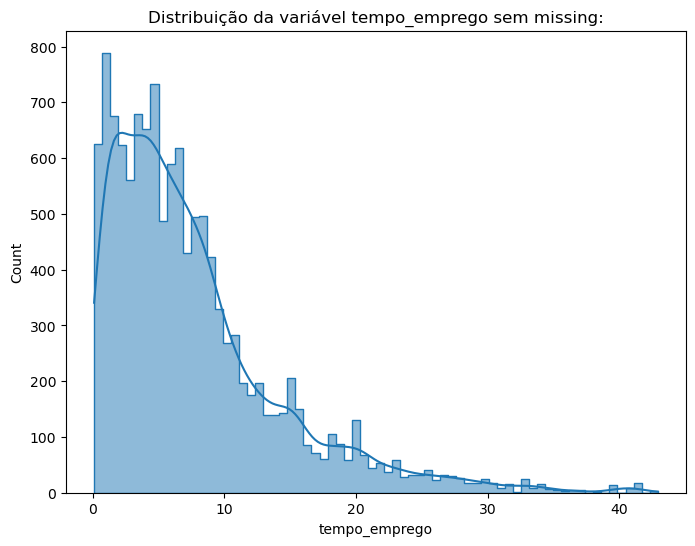

In [484]:
sns.histplot(data=previsao_renda,
             x='tempo_emprego',
             kde=True,
             element='step',
             label='Tempo de emprego'
            )
plt.title('Distribuição da variável tempo_emprego sem missing:')


Distribuição continua a mesma.

##### Ajuste do modelo de regressão linear simples:

In [684]:
reg_renda = smf.ols('renda ~ tempo_emprego', data=previsao_renda).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:48:01   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Resíduos')

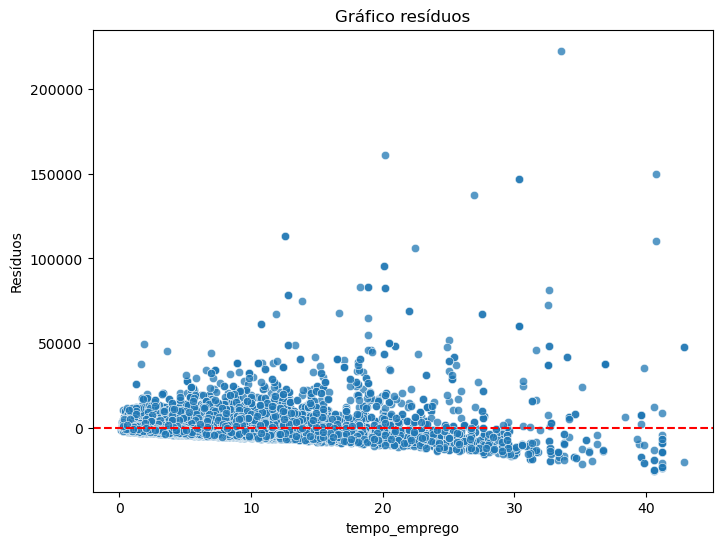

In [648]:
previsao_renda['resid'] = reg_renda.resid

sns.scatterplot(data=previsao_renda,
                x='tempo_emprego',
                y='resid',
                alpha=.75
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos')
plt.ylabel('Resíduos')

Gráfico de resíduos não ideal, possui os valores muito concentrados.

##### Tentativa de melhoria do $R^2$ e dos resíduos com um polinomio de terceiro grau:

In [690]:
reg_renda = smf.ols('renda ~ np.power(tempo_emprego,3) + tempo_emprego', data=previsao_renda).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     1120.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:32:50   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2762.7088    133.157     20.748      0.000    2501.700    3023.717
np.power(tempo_emprego, 3)     0.1597      0.020      8.106      0.000       0.121       0.198
tempo_emprego                392.6319     18.148     21.635      0.000     357.059     428.204
==============================================================================
Omnibus:                    16823.368   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7191455.226
Skew:                           7.552   Prob(JB):                         0.00
Kurtosis:                     119.878   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Resíduos')

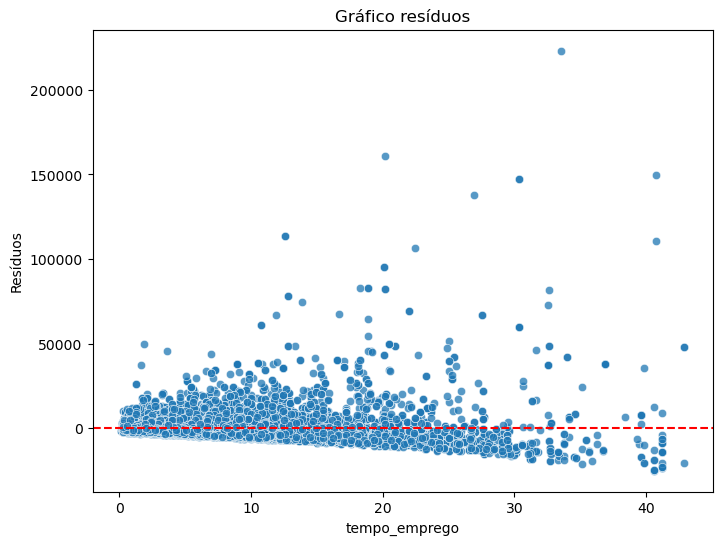

In [676]:
previsao_renda['resid'] = reg_renda.resid

sns.scatterplot(data=previsao_renda,
                x='tempo_emprego',
                y='resid',
                alpha=.75
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos')
plt.ylabel('Resíduos')

O valor do $R^2$ subiu, mas não de forma interessante, porém o gráfico de resíduos continua com a concentração de valores muito semelhante ao anterior.

##### Tentativa de melhoria do $R^2$ e dos resíduos com um polinomio de terceiro grau e aplicando a função log na variável resposta ```renda```:

In [716]:
reg_renda = smf.ols('np.log(renda) ~ np.power(tempo_emprego,3) + tempo_emprego', data=previsao_renda).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1306.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:35:32   Log-Likelihood:                -15130.
No. Observations:               12427   AIC:                         3.027e+04
Df Residuals:                   12424   BIC:                         3.029e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.7929      0.013    585.738      0.000       7.767       7.819
np.power(tempo_emprego, 3) -1.242e-05   1.97e-06     -6.306      0.000   -1.63e-05   -8.56e-06
tempo_emprego                  0.0646      0.002     35.605      0.000       0.061       0.068
==============================================================================
Omnibus:                       30.039   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.234
Skew:                           0.119   Prob(JB):                     2.72e-07
Kurtosis:                       2.960   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Resíduos')

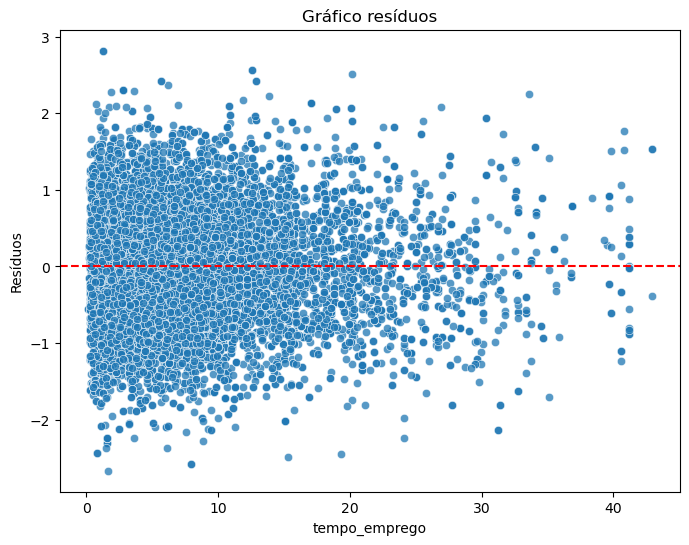

In [790]:
previsao_renda['resid'] = reg_renda.resid

sns.scatterplot(data=previsao_renda,
                x='tempo_emprego',
                y='resid',
                alpha=.75
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos')
plt.ylabel('Resíduos')

O valor do $R^2$ melhorou um pouco em relação ao anterior, porém o gráfico de resíduos já possui uma padrão menos específico, estando de forma mais distribuida.

##### Ajuste do modelo de regressão linear múltipla para explicar ```renda```:

In [720]:
reg_renda = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=previsao_renda).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:38:23   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

O valor do $R^2$ aumentou de maneira significativa, porém há muitas variáveis não significativas, tornando o modelo menos eficiente. 

##### Eliminando as variáveis não significativas e aplicando um polinomio de terceiro grau a variável ```tempo_emprego``` para obter o melhor $R^2$ que consigo:

In [837]:
reg_renda = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + estado_civil + idade + np.power(tempo_emprego,3) + tempo_emprego', data=previsao_renda).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     457.1
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:32:31   Log-Likelihood:                -13583.
No. Observations:               12427   AIC:                         2.720e+04
Df Residuals:                   12411   BIC:                         2.732e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.1062      0.037    194.550      0.000       7.035       7.178
sexo[T.M]                          0.7816      0.015     53.546      0.000       0.753       0.810
posse_de_veiculo[T.True]           0.0530      0.014      3.761      0.000       0.025       0.081
posse_de_imovel[T.True]            0.0871      0.014      6.342      0.000       0.060       0.114
tipo_renda[T.Bolsista]             0.2615      0.241      1.084      0.278      -0.211       0.734
tipo_renda[T.Empresário]           0.1649      0.015     11.101      0.000       0.136       0.194
tipo_renda[T.Pensionista]         -0.2721      0.241     -1.127      0.260      -0.745       0.201
tipo_renda[T.Servidor público]     0.0769      0.022      3.478      0.001       0.034       0.120
estado_civil[T.Separado]           0.0443      0.028      1.584      0.113      -0.011       0.099
estado_civil[T.Solteiro]          -0.0088      0.021     -0.428      0.669      -0.049       0.031
estado_civil[T.União]             -0.0351      0.025     -1.392      0.164      -0.084       0.014
estado_civil[T.Viúvo]              0.0711      0.042      1.704      0.088      -0.011       0.153
qtd_filhos                         0.0260      0.009      2.977      0.003       0.009       0.043
idade                              0.0051      0.001      6.555      0.000       0.004       0.007
np.power(tempo_emprego, 3)     -1.178e-05   1.75e-06     -6.730      0.000   -1.52e-05   -8.35e-06
tempo_emprego                      0.0702      0.002     42.939      0.000       0.067       0.073
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.259
Skew:                           0.024   Prob(JB):                        0.533
Kurtosis:                       3.013   Cond. No.                     2.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Análise dos resíduos para as variáveis utilizadas:

In [802]:
previsao_renda['resid'] = reg_renda.resid

Text(0, 0.5, 'Resíduos')

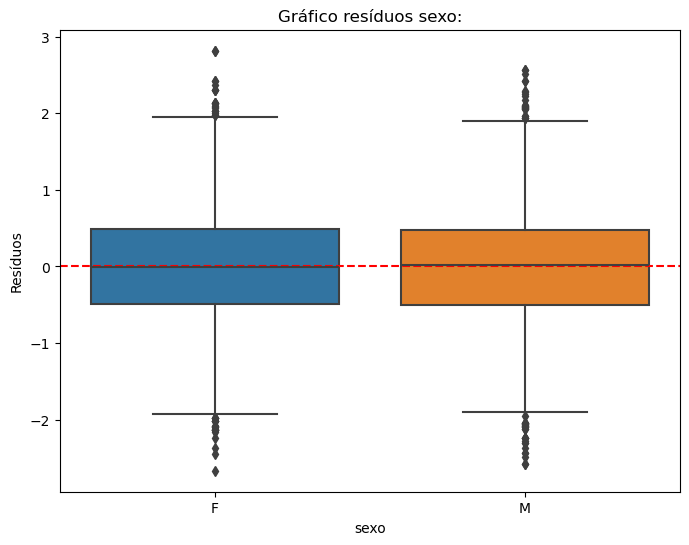

In [809]:
sns.boxplot(data=previsao_renda,
                x='sexo',
                y='resid',
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos sexo:')
plt.ylabel('Resíduos')

Apresenta variância uniforme.

Text(0, 0.5, 'Resíduos')

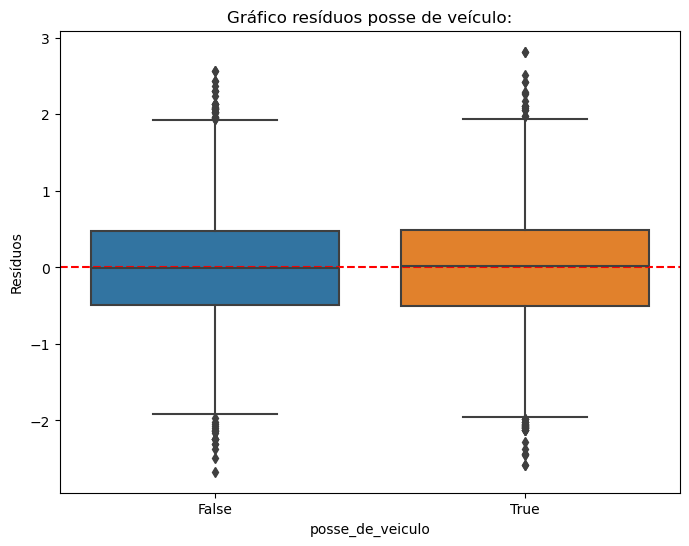

In [813]:
sns.boxplot(data=previsao_renda,
                x='posse_de_veiculo',
                y='resid',
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos posse de veículo:')
plt.ylabel('Resíduos')

Apresenta variância uniforme.

Text(0, 0.5, 'Resíduos')

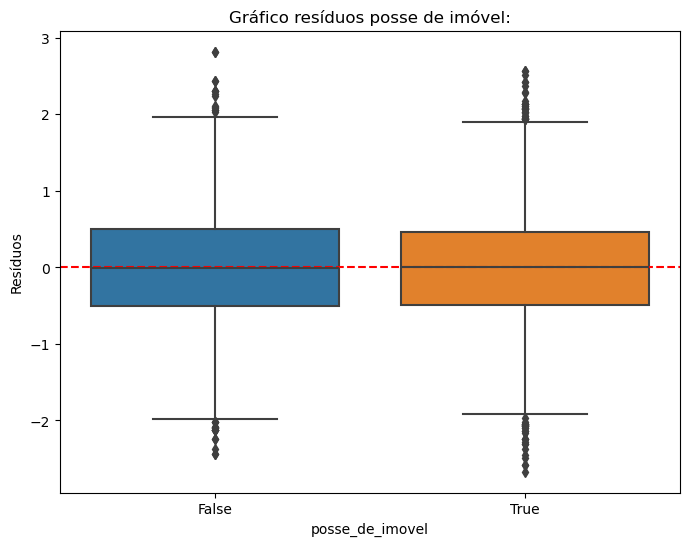

In [819]:
sns.boxplot(data=previsao_renda,
                x='posse_de_imovel',
                y='resid',
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos posse de imóvel:')
plt.ylabel('Resíduos')

Apresenta variância uniforme.

Text(0, 0.5, 'Resíduos')

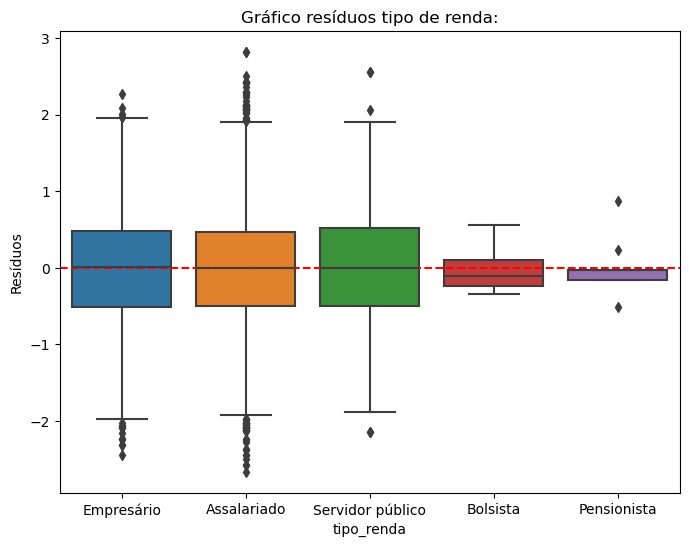

In [821]:
sns.boxplot(data=previsao_renda,
                x='tipo_renda',
                y='resid',
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos tipo de renda:')
plt.ylabel('Resíduos')

Nenhum padrão evidente.

Text(0, 0.5, 'Resíduos')

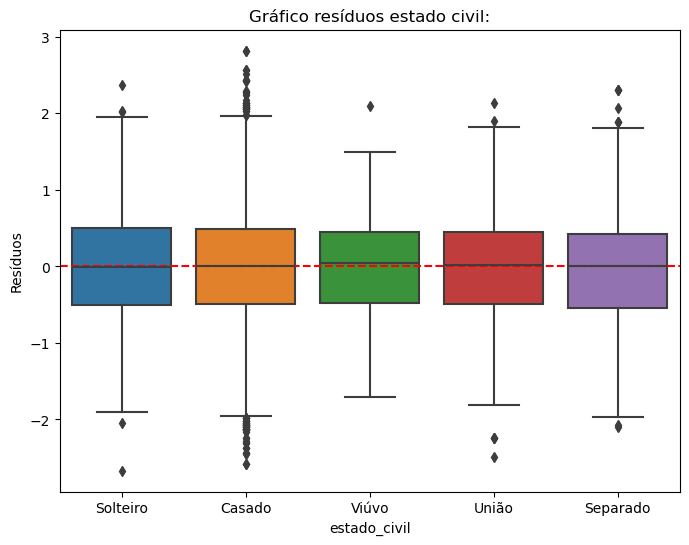

In [823]:
sns.boxplot(data=previsao_renda,
                x='estado_civil',
                y='resid',
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos estado civil:')
plt.ylabel('Resíduos')

Apresenta variância uniforme.

Text(0, 0.5, 'Resíduos')

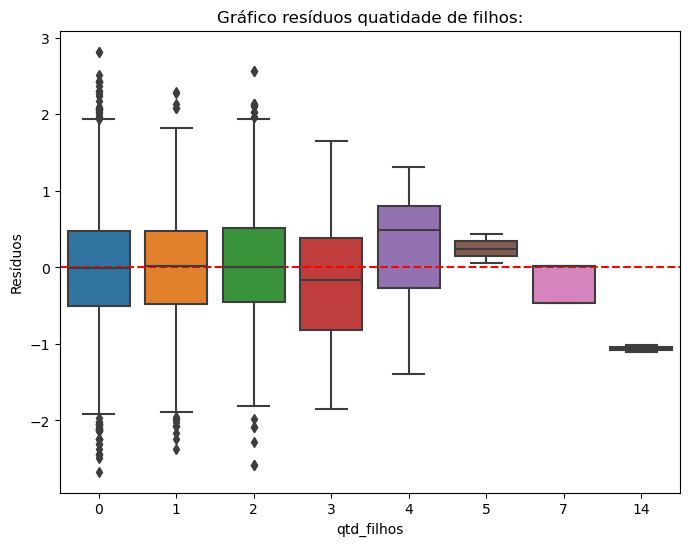

In [857]:
sns.boxplot(data=previsao_renda,
                x='qtd_filhos',
                y='resid',
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos quatidade de filhos:')
plt.ylabel('Resíduos')

Observa-se um padrão para os valores de filhos mais altos, porém são possíveis outliers. 

Text(0, 0.5, 'Resíduos')

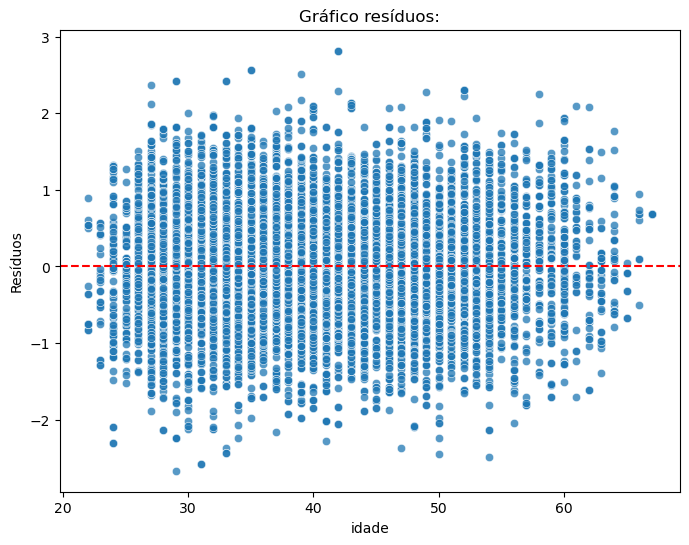

In [829]:
sns.scatterplot(data=previsao_renda,
                x='idade',
                y='resid',
                alpha=.75
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos:')
plt.ylabel('Resíduos')

Apresenta variância uniforme.

Text(0, 0.5, 'Resíduos')

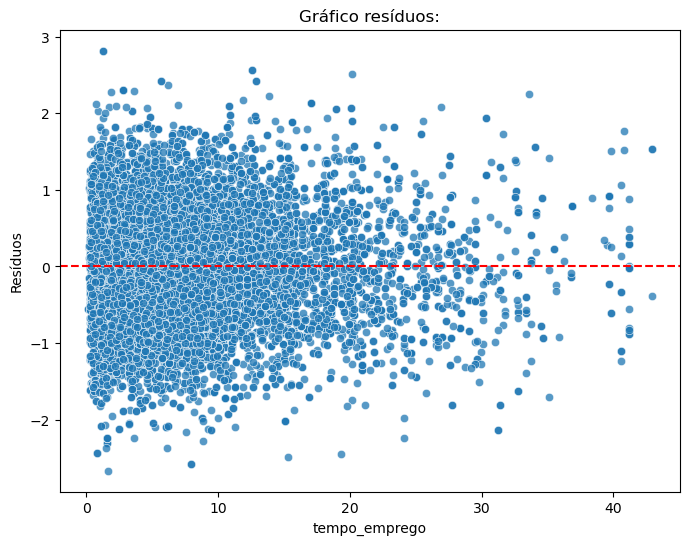

In [841]:
sns.scatterplot(data=previsao_renda,
                x='tempo_emprego',
                y='resid',
                alpha=.75
               )
plt.axhline(y=0,
            c='r',
            linestyle='--'
           )

plt.title('Gráfico resíduos:')
plt.ylabel('Resíduos')

Apresenta variância uniforme.

Para a o modelo ```reg_renda``` os resíduos das variáveis significativas utilizadas apresentam boa distribuição, sem apresentar um padrão. 

##### Ajuste do modelo aos dados:

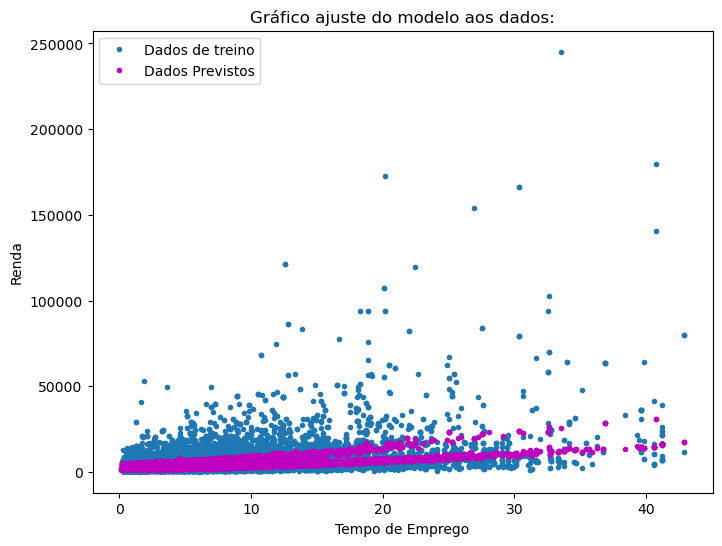

In [855]:
previsao_renda['pred_log'] = np.exp(reg_renda.fittedvalues)

plt.plot(previsao_renda['tempo_emprego'], previsao_renda['renda'], '.', label='Dados de treino')
plt.plot(previsao_renda['tempo_emprego'], previsao_renda['pred_log'], 'm.', label='Dados Previstos')
plt.title('Gráfico ajuste do modelo aos dados:')
plt.ylabel('Renda')
plt.xlabel('Tempo de Emprego')
plt.legend()

Apesar do modelo explicar apenas 35% dos dados apresentados, nota-se que se ajusta a eles de uma maneira satisfatória.